In [4]:
#-- DEFINITIONS --
import numpy as np
from astropy.cosmology import Planck18 as cosmo
h0 = cosmo.H(0).value/100
from colossus.cosmology import cosmology
from colossus.lss import mass_function
cosmology.setCosmology('planck18')

from gw_lensing.utils.constants import *
from gw_lensing.lens_population import number_halos as hmf

#PLOTTING MODULES
import matplotlib.colors as mc
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import ScalarFormatter
%config InlineBackend.figure_format = 'retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fontSZ = 17
fontSz = 15
fontsz = 13
fontssz = 11

new_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf']

import sys
dir_base=sys.path[0]
dir_out=dir_base+"/plots_optical_depth/"

## Number density of lenses

We compute the number density of lenses as a function of mass and redshift, which is chosen to follow the halo mass function (HMF). The HMF is defined as the number of halos per unit volume per unit mass. 

We get HMF from Colossus that implements Tincker et al. 2008 https://bdiemer.bitbucket.io/colossus/lss_mass_function.html. It outputs the HMF in units of $({\rm Mpc}/h_0)^{-3}$.

We can define the HMF with a mass defined by 200 times critical density.

**Note** however that the density of the halo is assumed to be NFW

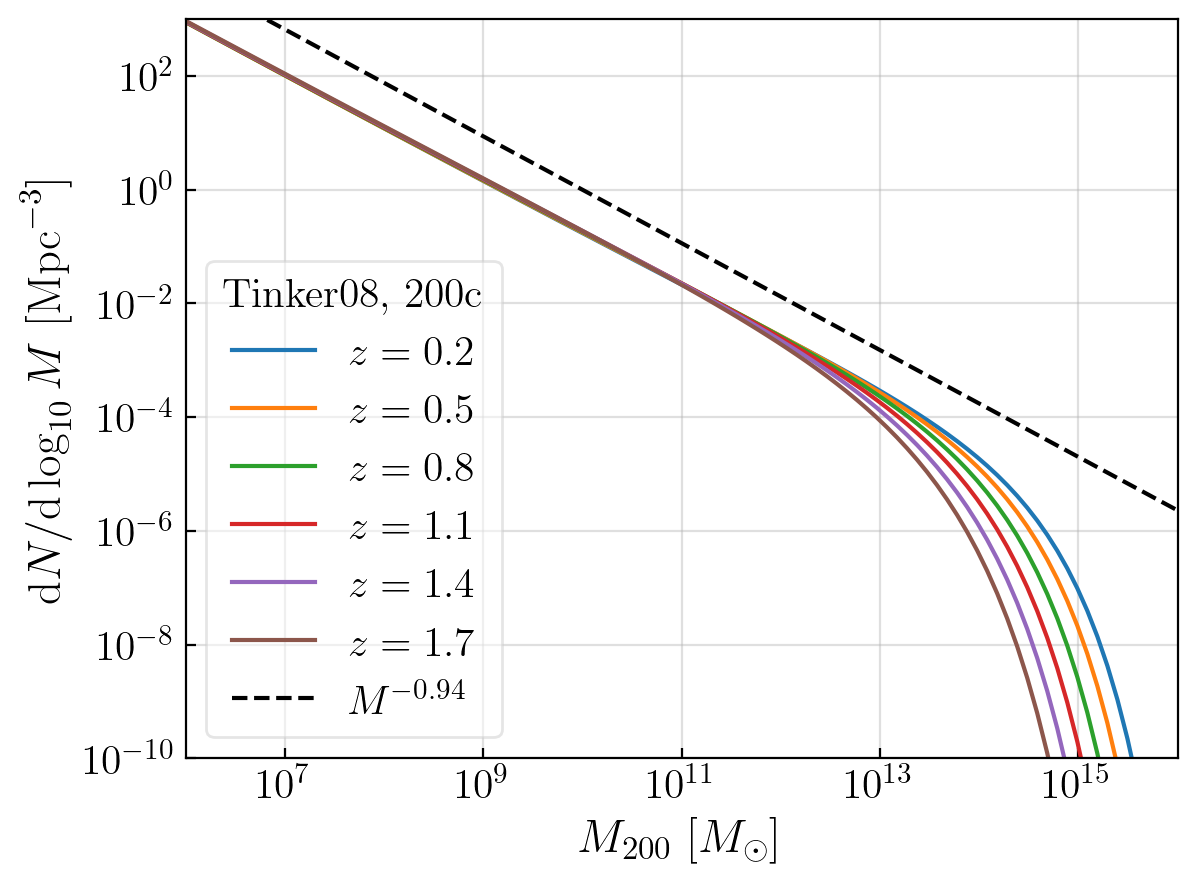

In [5]:
Ms = np.logspace(6,16,100)
nzs = 6
zs = np.linspace(0.2,1.7,nzs)

for i in range(nzs):
    # We plot in log10 space
    dndlog10M_tinker = (h0**3)*mass_function.massFunction(Ms, zs[i], mdef = '200c', model = 'tinker08',q_out = 'dndlnM')/np.log10(np.e)
    plt.loglog(Ms,dndlog10M_tinker,label=r'$z=%s$' % np.round(zs[i],1))

plt.plot(Ms,(Ms/1e10)**(-0.94),'k--', label = r'$M^{-0.94}$')
plt.xlabel(r'$M_{200}$ [$M_\odot$]',fontsize=fontSZ)
plt.ylabel(r'$\mathrm{d}N/\mathrm{d}\log_{10} M$ [$\mathrm{Mpc}^{-3}$]',fontsize=fontSZ)
plt.tick_params(axis='both',which='both',direction='in',labelsize=fontSz)


legend = plt.legend(ncol=1,fontsize=fontSz, framealpha=0.5, title='Tinker08, 200c')

plt.setp(legend.get_title(),fontsize=fontSz)
plt.grid(alpha=0.4)
plt.xlim([min(Ms),max(Ms)])
plt.ylim([1e-10,1e3])
#plt.savefig('dndlog10M_tinker.pdf',bbox_inches='tight')
plt.show()

This figure can be compared to Robertson et al. [https://arxiv.org/abs/2002.01479] Fig. 1.

In [6]:
# 10 square degrees in steradians
area = 40000 # square degrees
fraction_sky = area * (np.pi/180)**2 / 4/np.pi
print('Omega = %s' % fraction_sky)

Omega = 0.9696273622190719


N at z= 2.0  is  181.057946778072
N at z= 2.0  in  10  square degrees  is  0.04388968483580576


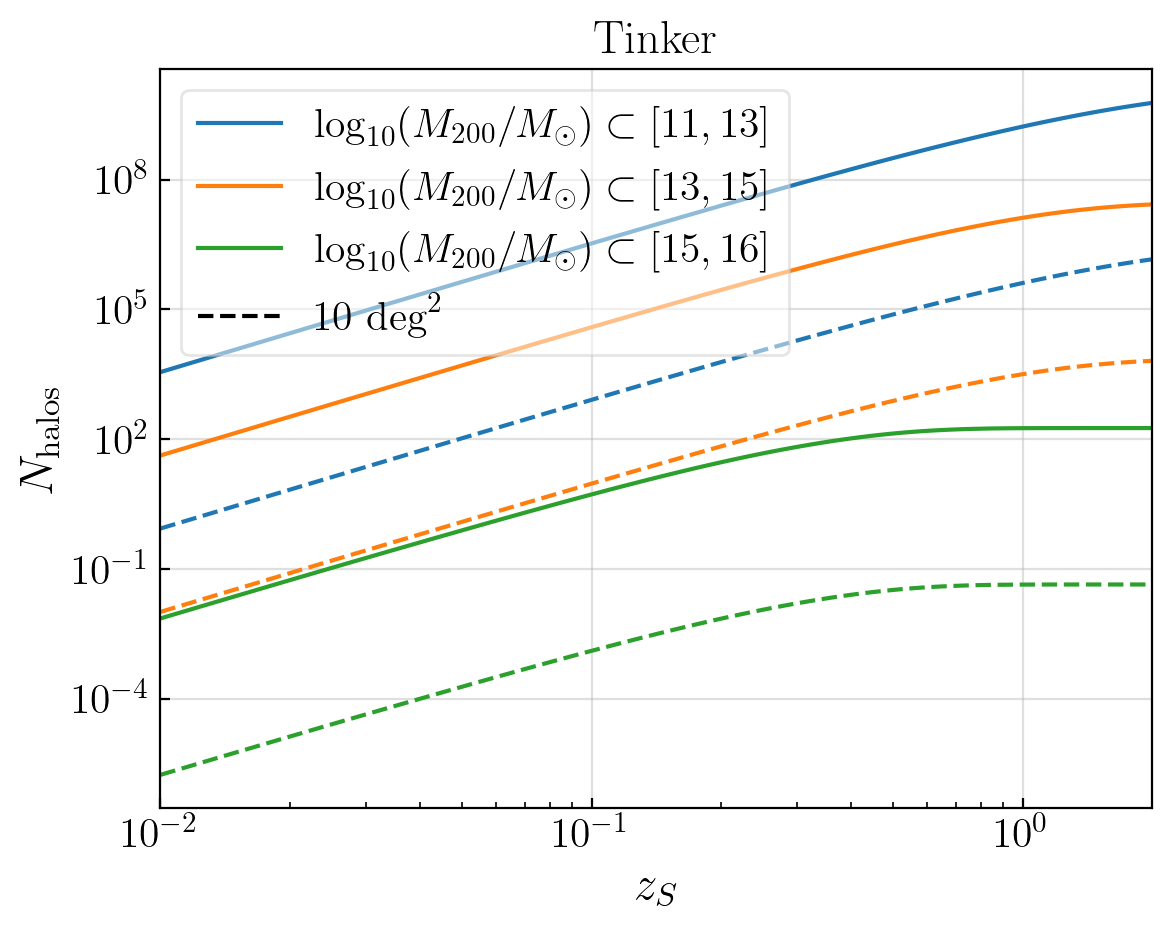

In [8]:
nzs = 100
z_Ss = np.logspace(-2,np.log10(2),100)

area = 10 # square degrees
fraction_sky = area * (np.pi/180)**2 / 4/np.pi

#log10Mmin,log10Mmax, nMs = 6, 16, 1000
#nSIS_tot = hmf.n_halo(z_Ss,log10Mmin,log10Mmax,nMs,nzs)
#plt.loglog(z_Ss,nSIS_tot,lw=2,label=r'$\log_{10}(M_{200}/M_\odot)\subset [%s,%s]$' % (log10Mmin,log10Mmax))
#print('N at z=',z_Ss[-1],' is ',nSIS_tot[-1])
log10Mmin,log10Mmax, nMs = 11, 13, 1000
plt.loglog(z_Ss,hmf.n_halo(z_Ss,log10Mmin,log10Mmax,nMs,nzs),label=r'$\log_{10}(M_{200}/M_\odot)\subset [%s,%s]$' % (log10Mmin,log10Mmax))
plt.loglog(z_Ss,fraction_sky*hmf.n_halo(z_Ss,log10Mmin,log10Mmax,nMs,nzs),'--',color=new_colors[0])
log10Mmin,log10Mmax, nMs = 13, 15, 1000
plt.loglog(z_Ss,hmf.n_halo(z_Ss,log10Mmin,log10Mmax,nMs,nzs),label=r'$\log_{10}(M_{200}/M_\odot)\subset [%s,%s]$' % (log10Mmin,log10Mmax))
plt.loglog(z_Ss,fraction_sky*hmf.n_halo(z_Ss,log10Mmin,log10Mmax,nMs,nzs),'--',color=new_colors[1])
log10Mmin,log10Mmax, nMs = 15, 16, 1000
plt.loglog(z_Ss,hmf.n_halo(z_Ss,log10Mmin,log10Mmax,nMs,nzs),label=r'$\log_{10}(M_{200}/M_\odot)\subset [%s,%s]$' % (log10Mmin,log10Mmax))
plt.loglog(z_Ss,fraction_sky*hmf.n_halo(z_Ss,log10Mmin,log10Mmax,nMs,nzs),'--',color=new_colors[2])
nSIS = hmf.n_halo(z_Ss,log10Mmin,log10Mmax,nMs,nzs)
print('N at z=',z_Ss[-1],' is ',nSIS[-1])
print('N at z=',z_Ss[-1],' in ',area,' square degrees',' is ',nSIS[-1]*fraction_sky)


plt.loglog([],'--',color='k',label=r'$%s\ \mathrm{deg}^2$' % area)
#plt.axhline(1,min(z_Ss),max(z_Ss),ls='--',color='k')

plt.title(r'Tinker',fontsize=fontSZ)
plt.xlabel(r'$z_S$',fontsize=fontSZ)
plt.ylabel(r'$N_\mathrm{halos}$',fontsize=fontSZ)
plt.tick_params(axis='both',which='both',direction='in',labelsize=fontSz)
legend = plt.legend(ncol=1,fontsize=fontSz, framealpha=0.5,loc='upper left')#,bbox_to_anchor=(0.5,1.02)
plt.setp(legend.get_title(),fontsize=fontSz)
plt.grid(alpha=0.4)
plt.xlim([min(z_Ss),max(z_Ss)])
#plt.savefig('n_halos.pdf', bbox_inches='tight', transparent=True)
plt.show()